In [1]:
%maven org.projectlombok:lombok:1.18.18

import lombok.*;
import java.util.stream.*;

- Java objects are instances of a class
- reference: variable of compatible type that points to an object in memory
- instance variables
  - fields
  - can be initialized with default value like `private String foo = "bar"`
  - uninitalized instance variables are defauled to
    - primitiv numeric: 0
    - boolean: false
    - objects: null
- `new` operator
  - instanciates class
  - allocates the memory
- objects can have multiple references
- `this` - explicitly accessing an instance variable name instead of local variable name
- `final`
  - once initalized
  - can't be changed afterwards
  - used for constants
  - on local variables: no re-assignment possible

In [32]:
class Product {
    String name;
    
    public static void muh() {System.out.println("muh");}
}

// objects are referenced
Product p1 = new Product();
Product p2 = p1;
System.out.println(p1);
System.out.println(p2);

REPL.$JShell$18F$Product@6a9930ac
REPL.$JShell$18F$Product@6a9930ac


## static
- each class has its own memory context
- `static` describes variables and methods that belong to that class context
- do _not_ belong to particular instance
- objects of the class share static context
- inside `static` the `this` keyword is meaningless
- static methods: belong to the class
- synonym: class variables and class methods

## Accessing static context

In [3]:
// directly via class
Product.muh()

muh


- use `static {...}` initializer block to init static vars
  - triggered _1x_ when class is loaded to memory  (think of AbstractFactcastTest)

In [4]:
class StaticProduct {
    private static String name;
    static {
        name = "Juergen";
    }
    
    public static void setName(String name) {
        StaticProduct.name=name;
    }
    
    public static String getName() {
        return name;
    }
}

StaticProduct.getName();

Juergen

In [5]:
StaticProduct.setName("Petra");
StaticProduct.getName();

Petra

- static methods can also be accessed via the instance
- still, it's the same static context used

In [6]:
var p1 = new StaticProduct();
p1.getName();

Petra

In [7]:
p1.setName("Jonny");
p1.getName();

Jonny

## Private Constructor And Method in Same Class

In [26]:
class Foo {
    private Foo() {}
    
    // methods are in the same class and hence can use the private construtor
    public static void main() {
        var f1 = new Foo();
        var f2 = fooFactory();
    }
    
    public static Foo fooFactory() {
        return new Foo();
    }
}

## Constant

In [8]:
class Foo {
    public static final String MY_FOO = "BAR";
}

Foo.MY_FOO

BAR

- you could also have constants per instance (via `final`) -> instance specific
- static constants are shared between the instances (only exist once)

## Other Static contexts
- main
- Java Math operations are static
- Factory methods are static and create a new instance of a class


## Static import

- syntax: `import static java.package.of.static.method;`
- use the imported method/ constant as if it is local

## Method Overloading
- need to be the same
  - method name
  - return type !
- parameters differ

## vargs

In [5]:
// requires 0:n arguments
// names is a String[]
void shoutNames(String... names) {
    for (String name : names) {
        System.out.println(name.toUpperCase());
    }
}

shoutNames("Ronny", "Petra", "Klaus")

RONNY
PETRA
KLAUS


In [4]:
// requires 1:n arguments
// iteration via recursion
void shoutNames(String name, String... names) {
    Arrays.stream(names).forEach(it -> shoutNames(it));
    
    System.out.println(name.toUpperCase());
}

shoutNames("Ronny", "Petra", "Klaus")

PETRA
KLAUS
RONNY


## Constructor
- specialized method that initializes the object
- same name as class
- no return type
- usually public
- may be overloaded
- _default constructor_ with no parameter is implicitly added to the class _if no other constructor is defined_
- adding no-args constructor myself to provide e.g. a constructor with- and without params

## Reuse Constructor
- have e.g. common initialization

In [6]:
public class Foo {

    public Foo() {
        // add common initalization logic here
        System.out.println("no-args constructor called");
    }
    
    public Foo(String unused) {
        this();  // calls no-args constructor
    }
}

new Foo("bar");

no-args constructor called


REPL.$JShell$19$Foo@53a71b57

## Immutable Object
- state is private
- initialization only immediatly or via constructor
- no setters
- many JDK classes are designed this way
- automatically thread-safe without coordinating synchronized access

In [11]:
public class Product {
    // 'final' trade-off:
    // - does not add more immutability here
    // - forces initialization either immediately or in *all* constructors
    private final String name;
    private BigDecimal price = BigDecimal.ZERO;
    
    public Product(String name, BigDecimal price) {
        this.name = name;
        this.price = price;
    }
    
    public String getName() {
        return name;
    }
    
    public BigDecimal getPrice() {
        return price;
    }
}

var p = new Product("foo", BigDecimal.valueOf(12.55));
System.out.println(p.getName());
System.out.println(p.getPrice());

foo
12.55


## Instance Initializer
- invoked when instance is created, before any constructor
- useful when
  - more then 1 line of code is required
  - multiple fields are involved in initialization
  - avoiding repetive code in constructors
  
- issues:
  - readability, can easily be mistaken with an anonymous class implementation

In [1]:
public class Foo {

    private String letter = "A"; // 'A' is always overwritten

    { letter = "B"; }

    public Foo() {}
    public Foo(String letter) {
        this.letter = letter;
    }
    
    public String getLetter() {return letter;}
}

In [2]:
new Foo().getLetter();

B

In [3]:
new Foo("C").getLetter();

C

## Enumerations
- envison 
    - a sealed class 
    - which can have behaviour 
    - but no state
- fixed set of instances of a particular type
- enum values are implicitly
  - public
  - static
  - final
- can be imported via `import static`
- constructor (if provided): must be private or default visibility
- declaration of enum values invoke the enum constructor
- values are
    - comma separated
    - first in the definition (before fields/ constructors...)
- loaded once at startup
- can't extend

In [4]:
// three hard-coded instances 
public enum Condition { 
    HOT, WARM, COLD;   // calls internally the no-args constructor
}

In [9]:
Arrays.toString(Condition.values())

[HOT, WARM, COLD]

In [10]:
Condition.valueOf("WARM")

WARM

In [11]:
Condition.valueOf("warm")

EvalException: No enum constant REPL.$JShell$22.Condition.warm

### Enums start counting from 0

In [6]:
Arrays.stream(Condition.values()).forEach(it -> System.out.println(it.ordinal()))

0
1
2


In [16]:
Condition c = Condition.HOT;
switch (c) {
    case HOT:
        System.out.println("really hot");
        break;
    default:  // note: no 'case' here
        System.out.println("not so hot");
}

really hot


In [17]:
public enum Condition {
    HOT("really hot"),    // calling the constructor with parameter
    COLD("bitter cold");
    
    private String desc;
    private Condition(String desc) {  // constructor to initializes instances
        this.desc = desc;
    }
    
    public String getDescription() {return desc;}
}

Condition.HOT.getDescription();

really hot

### Compare with equals() and '=='
- only initialized 1x by the JVM

In [12]:
enum Seasons {SPRING, SUMMER, FALL, WINTER}

var a = Seasons.SPRING;
var b = Seasons.SPRING;
a.equals(b)

true

In [13]:
a == b

true

In [14]:
// enums are Java classes - not primitives
Seasons.SPRING == 2

CompilationException: 

### Switching via Enum

In [15]:
var season = Seasons.WINTER;
switch (season) {
    // case Seasons.WINTER:   // does not compile
    // case 0:                // does not compile
    case WINTER:
        System.out.println("it's cold");
        break;
    default:
        System.out.println("it's not freezing");
}

it's cold


### Constructor and Fields
- enum constructors are implicitly private - modifier is optional
    - you can't extend anyway
    - constructor can only be called inside the enum

In [16]:
public enum Season {
    WINTER("Low"),   // creating enum value instances by calling the private constructor
    SPRING("Medium"), // ! comma separeted !
    SUMMER("High"),
    FALL("Medium");
    
    private final String expectedVisitors;   // final for immutability, 
                                             // not required but also here good practice
    
    private Season(String expectedVisitors) {
        System.out.println("constructing " + this.name());
        this.expectedVisitors = expectedVisitors;
    }
    
    public void printExpectedVisitors() {
        System.out.println(expectedVisitors);
    } 
}

// enum values are constructed only once when used the 1st time
Season.FALL.printExpectedVisitors();
Season.FALL.printExpectedVisitors();

constructing WINTER
constructing SPRING
constructing SUMMER
constructing FALL
Medium
Medium


- no `public` or `protected` constructors:

In [17]:
public enum Invalid { 
    KUH("muh");
    
    private final String noise;
    
    public Invalid(String noise) {
        this.noise = noise;
    }
}

CompilationException: 

### Specific Methods Per Enum Value

In [19]:
public enum Season {
    WINTER {
    // override the default below
        public String getHours() { return "10am-3pm"; }
    },
    SUMMER {
        public String getHours() { return "9am-7pm"; }
    },
    SPRING, FALL;
        // the default
        public String getHours() { return "9am-5pm"; }
}

In [46]:
Season.WINTER.getHours()

10am-3pm

In [47]:
Season.SPRING.getHours();

9am-5pm

### Crazy Shit - an Enum can have abstract methods
- requires **each enum value** to implement the method

In [14]:
public enum Season {
    WINTER {
        public String getHours() { return "10am-3pm"; }
    },
    SUMMER {
        public String getHours() { return "9am-7pm"; }
    },
    SPRING {
        public String getHours() { return "9am-5pm"; }
    };   // !! <---- mind the semicolon if there is code following !!!
    
    public abstract String getHours();
}

# Java Memory Allocation
- stack and heap
- stack
  - memory context of thread
  - stores local method variables
  - may only contain
    - primitives
    - object references
- heap
  - shared memory area
  - accessible from different methods and thread contexts
  - contains everything the stack does not contain ;-)
  - contains classes + objects

## Example
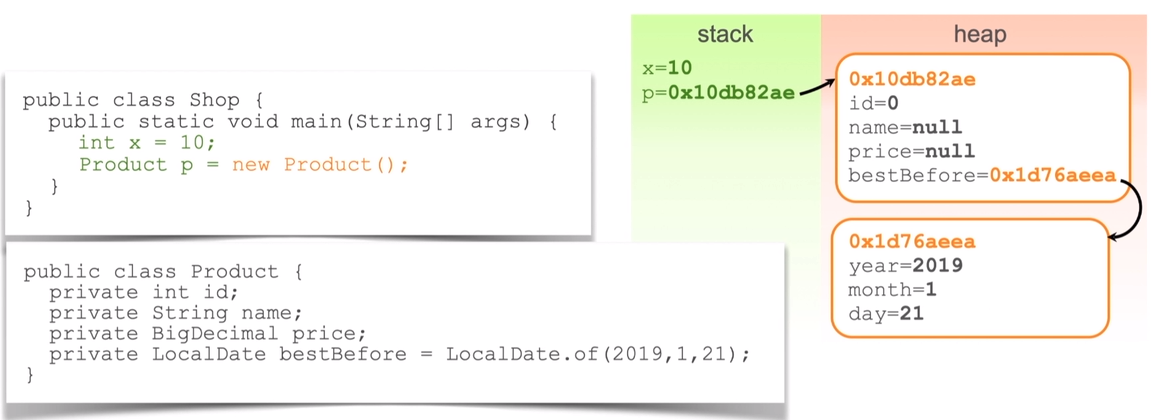
- primitive `x` is stored in stack
- `Product` object (the instance) is placed on heap as well as the depending `LocalDate`
- the reference `p` to `Product` ist stored in the stack

## Passing Arguments Example
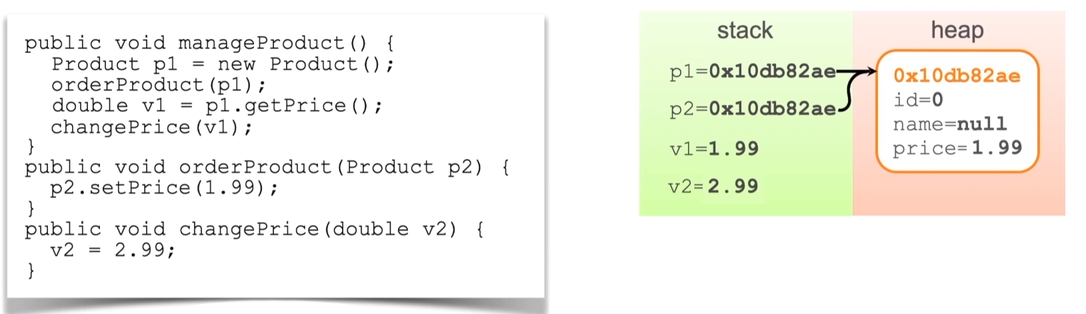
- when calling `orderProduct(p1)` the value of `p1` (the reference to a `Product` in the heap) is copied to the stack frame of `orderProduct`
- now `p1` and `p2` reference the same object in the heap
- calling `p2.setPrice(..)` modifies the referenced object directly in the heap
- `double v1 = p1.getPrice()` - copies primitive value from the heap object to the stack
- `changePrice(v1)` - copies the primitive value to the stack frame of the `changePrice()` method

### takeways
- passing an object
 - copying the reference of the object
 - holder of the reference share the same object
- passing a primitive
  - copies of the value are passed around
  - modification is independent
  
## Cleanup Memory
- stack
  - as soon as method ends memory is freed
  - variables become invalid
- heap
  - via Garbage collection
  - when an object is not referenced anymore it becomes eligible for Garbage collection (get's marked)
  - that means no stack frame owns a reference to an object anymore
  - garbage collection general goal: as little time in "stop the world"
  

# Inheritance

In [18]:
// class Foo {} 
// class Foo extends Object {} 
// are identical

generic methods inherited from `Object`
- `toString()` 
- `equals(..)` - compare pair of objects
- `hashCode()` - helps to generate hash value fo object
- `clone(..)` - create replica for the object
- `wait()`, `notify()` and `notifyAll()` control threads


- when invoking e.g. `toString()`
 - call goes up the inheritance hierarchy
 - looks for most specific implementation of `toString()`
 - if nothing is found on the "way up" the Object.toString() is used


- referencing an object: specific type or any of its parents


In [19]:
Object a = new Integer(1);
Number b = new Integer(1);
Integer c = new Integer(1);

Type casting rules:
- required when assigning parent to child references
- not required for child -> parent reference
- not possible between sibbling objects

In [20]:
// force an 'Object' into an 'Integer'   -> casting otherwise compiler complains
Integer e = (Integer)a;

// assigining parent to child reference -> no casting
Object d = c;

In [21]:
class Person {
    private String name;
    
    public Person(String name) {this.name = name;}
    
    String getName() {return name;}
    
    String mood() {return "ok";}
}

class Student extends Person {
    public Student(String name) {
        super(name);
    }
    
    public String toString() {
        // can't directly access "name" since "private" in parent
        return "Name is " + super.getName();
    }
    
    String mood() {return "great";}
    
    String generalMood() {return 
        "Student mood " + this.mood() + 
        ", Person mood: " + super.mood(); }  //using 'super' to differentiate methods with same name
}

Student s = new Student("Filou");
s

Name is Filou

In [22]:
s.generalMood()

Student mood great, Person mood: ok

- by default always the no-args constructor of parent is called. For `Product` this is `Object`s constructor:
<img src=attachment:image.png width=400></img>

- Note: `Object` provides a no-args constructor
- parent constructor must be invoked to intialize variables
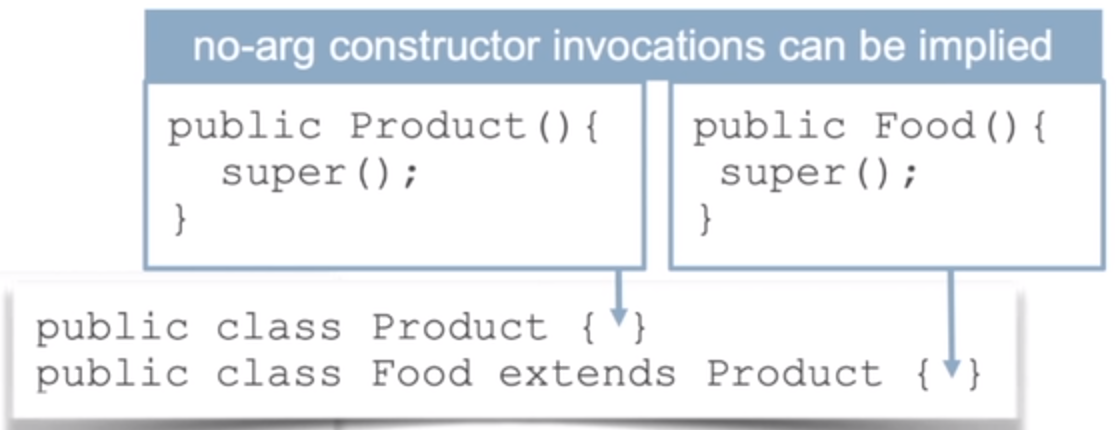

### Class + Object Initialization Summary
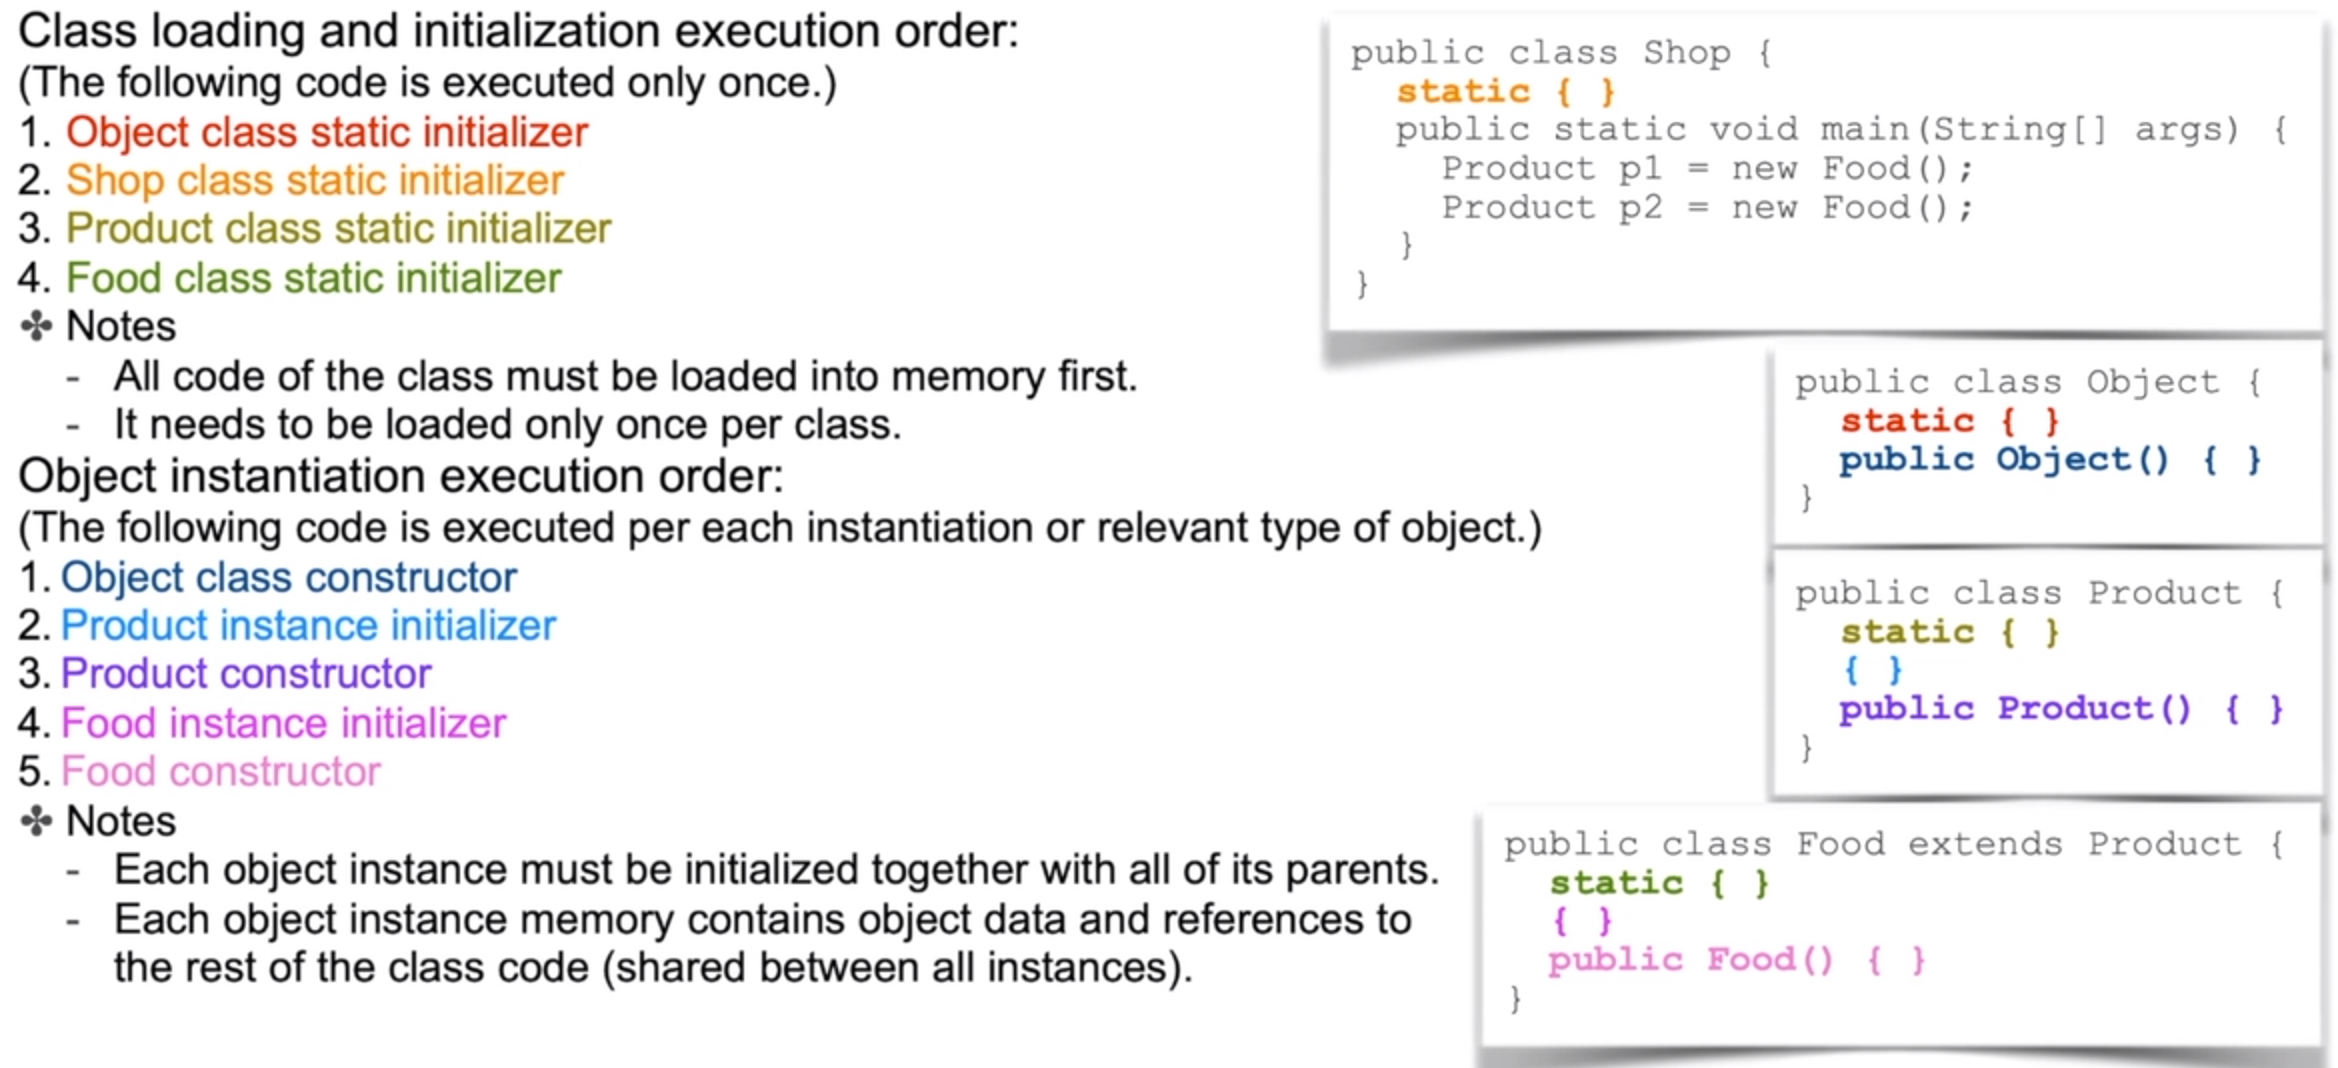

- Object instanciation order is executed for _each_ new `Food` created

## Polymorphism
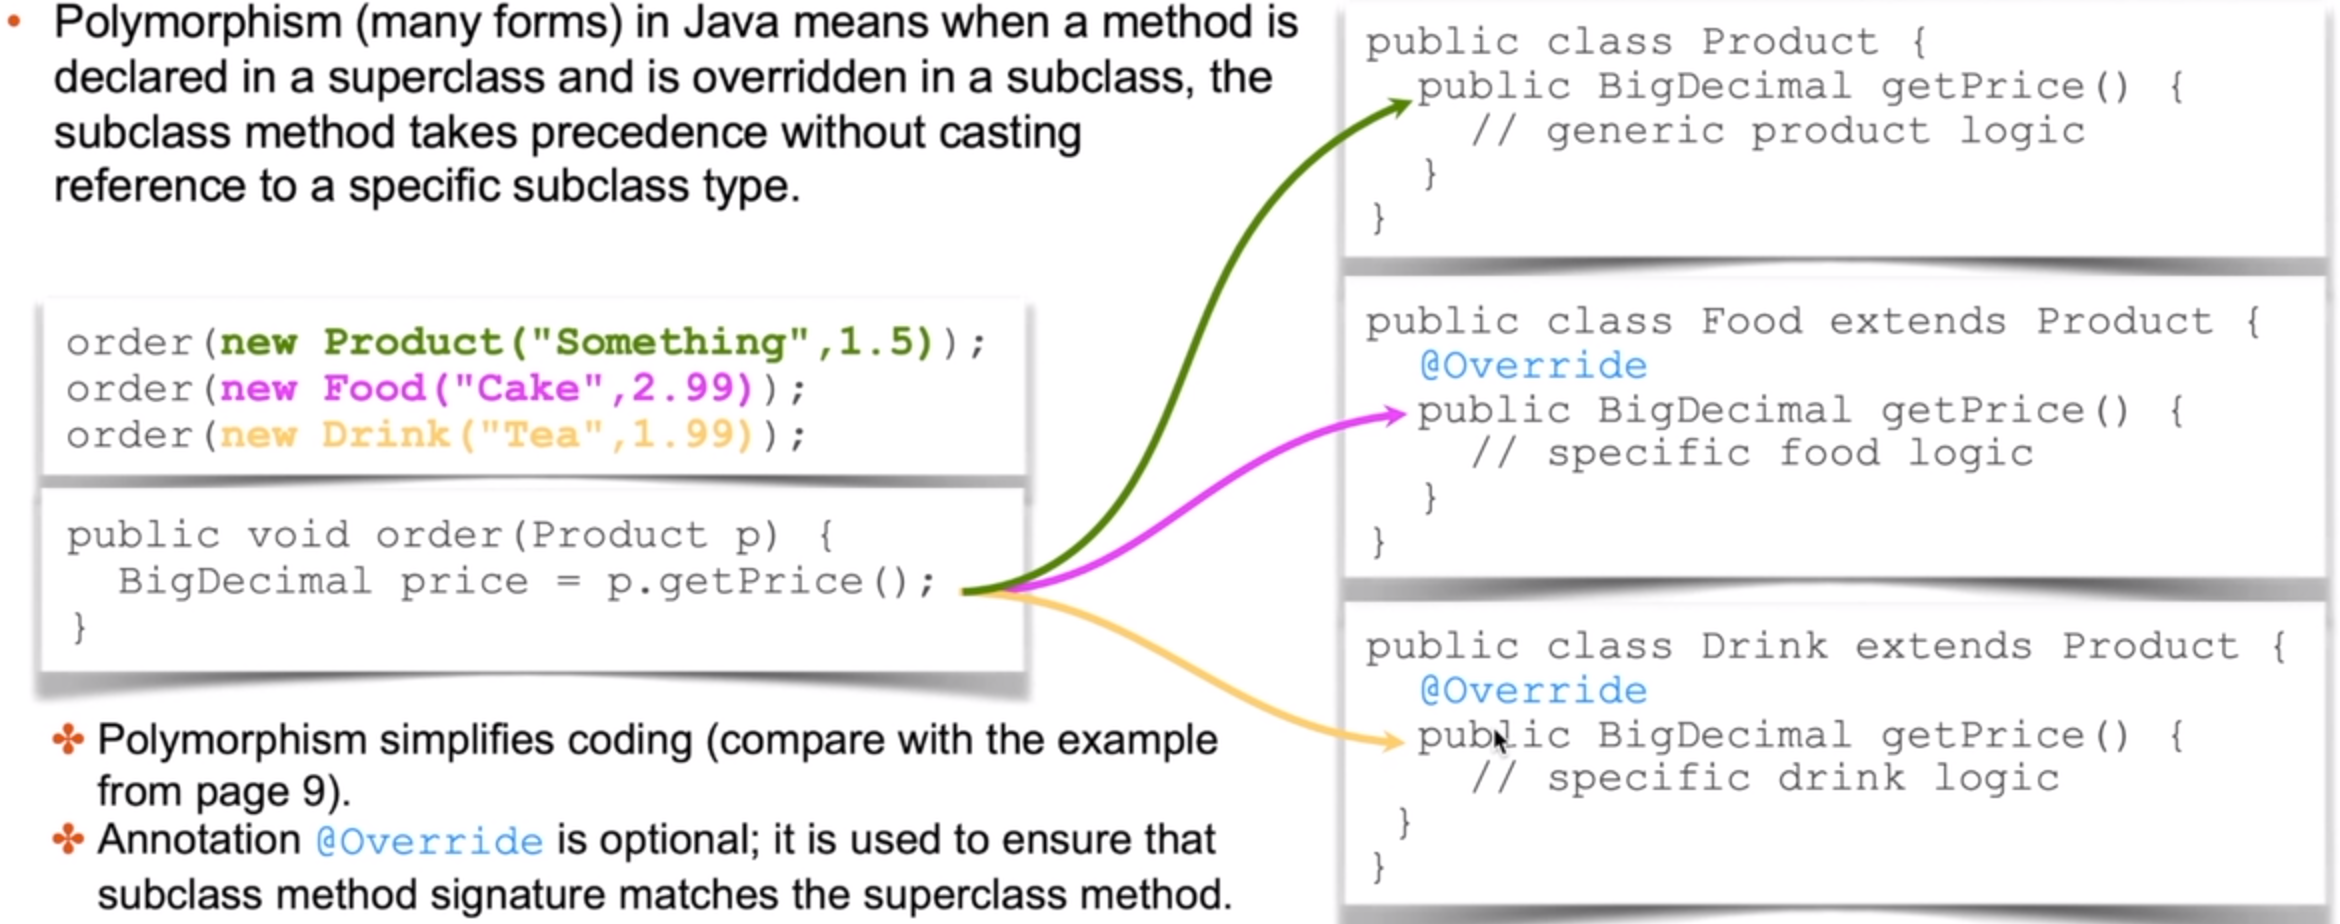

- most specific implementation of `getPrice` is called
- `Product.getPrice` is default which can be overridden
- note: 
  - when overriding a method you can't narrow the access modifier but only widen it
  - parent.private -> child.protected   ok
  - parent.public -> child.protected    not ok


## Abstract On Class and Methods
- `abstract` to encourage class extensibility
- class level: can't be directly instanciated, must be subclassed
- method level: 
  - just method signature without implementation (similar to interfaces)
  - subclasses _must_ overwrite (implement) abstract methods of parent

in contrast to:

## Final on Class And Methods
- `final` to limit class extensibilty
- class level: can't be subclassed. Inheritance ends here
- method level: method can't be overwritten. Parent method needs to be accepted

Note: `final` on variable
- becomes a constant
- can't be reassigned


In [18]:
// "final" + "var" is allowed
void foo() {
    final var a = "";
}

## Overriding default methods

### equals
- "==" operator 
  - compares values in the _stack_ !
  - comparing primitives
  - check if two references are pointing to the same object
- overriding `equals` enables comparission on the _heap_

- signature `public boolean equals(Object obj)`
- general algorithm
  - Is obj == this (identity)? -> true
  - Is obj instance of MyType?
  - cast obj to MyType other
  - compare single fields of MyType either with _==_ or _equals_ and early return false
  - at the end of the method return "true"
- `Object.equals` includes already null check (convinience)


In [23]:
class Product {
    private final String name;
    private final BigDecimal price;
    
    public Product(String name, BigDecimal price) {
        this.name = name;
        this.price = price;
    }
    
    public boolean equals(Object obj) {
        if (this == obj) return true;
        if (! (obj instanceof Product)) return false;
        Product other = (Product) obj;

        return Objects.equals(this.name, other.name) &&
            Objects.equals(this.price, other.price);
    }
}

In [24]:
// self
Product p1 = new Product("miau", BigDecimal.valueOf(12.99));
p1.equals(p1);

true

In [25]:
// differenct class
p1.equals(new String("hi"));

false

In [26]:
// same content (on the heap) but different references
Product p2 = new Product("miau", BigDecimal.valueOf(12.99));
p1 == p2;

false

In [27]:
// identical content
p1.equals(p2);

true

In [28]:
// re-assign reference
// orginal object of p2 has no reference anymore -> GC candidate
p2 = p1;
p1 == p2;

true

In [29]:
// different content
Product p3 = new Product("wuff", BigDecimal.valueOf(12.99));
p1.equals(p3);

false

### hashCode
- integer which is _the objects identity_

Rules:
- must consisently return same `int` for same instance (required for bucketing in e.g. HashTable)
- relation to `equals`: two objects which are equal should return the same hashcode
- `Objects.hash` helps

In [36]:
class Product {
    private String name;

    public Product(String name) {this.name = name;}

    public int hashCode() {
        return Objects.hash(name);
    }
}

In [35]:
new Product("wuff").hashCode();

3660861

# Comparing Strings

- due to string internment multiple references can point to same String object
- to avoid confusion: always compare via `equals`

Note: strings are stored in _String pool_ memory area

In [47]:
// interning, same string points to same heap location (=same reference)
String s1 = "Hello world";
String s2 = "Hello world";

s1 == s2

true

In [39]:
// no interning
String s3 = new String("Hello world");
s1 == s3

false

In [42]:
// equals works reliably
s1.equals(s2) && s1.equals(s3)

true

# Factory Method Pattern
- dynamically choose subtype to be created
- invoker remains subtype unaware
- later addition of subtype may not effect invokers

Thought: reduces the subtypes to only the methods provided by parent (`Product`)

In [60]:
abstract class Product {
    abstract void whoAmI();
}

class Drink extends Product {
    @Override
    void whoAmI() {System.out.println("I am a drink");};
}

class Food extends Product {
    @Override
    void whoAmI() {System.out.println("I am food");};
}

enum ProductType {DRINK, FOOD}

public Product createProduct(ProductType productType) {
    switch (productType) {
        case DRINK:
            return new Drink();
        case FOOD:
            return new Food();    
    }
    throw new UnsupportedOperationException("Unsupported product: " + productType);
}

In [61]:
Product p1 = createProduct(ProductType.DRINK);
p1.whoAmI()

I am a drink


In [62]:
Product p1 = createProduct(ProductType.FOOD);
p1.whoAmI()

I am food
